### Dimensionality Reduction Review
##### 12Dec18
Using proportional downsampling techniques, get subsets of discrete and continous data to feature-select prior to running DR algorithms for comparison on relatively low-dimensional raw data.

In [1]:
from fcc_DRs import *
from fcc_utils import *

Using TensorFlow backend.


In [85]:
# reload functions when editing file
import sys
del sys.modules['fcc_DRs']
from fcc_DRs import *

Continue work from `checkpoint_07Dec18.ipynb` using Myeloid dataset as continuous example

---
#### 5. Repeat for continuous dataset

In [47]:
myeloid = RNA_counts.from_file('inputs/GSE72857_umitab.txt.gz', cells_axis=1)

In [49]:
myeloid.gene_IDs

Index(['0610007C21Rik;Apr3', '0610007L01Rik', '0610007P08Rik;Rad26l',
       '0610007P14Rik', '0610007P22Rik', '0610008F07Rik', '0610009B22Rik',
       '0610009D07Rik', '0610009O20Rik', '0610010B08Rik;Gm14434;Gm14308',
       ...
       'mTPK1;Tpk1', 'mimp3;Igf2bp3;AK045244', 'mszf84;Gm14288;Gm14435;Gm8898',
       'mt-Nd4', 'mt3-mmp;Mmp16', 'rp9', 'scmh1;Scmh1', 'slc43a2;Slc43a2',
       'tsec-1;Tex9', 'tspan-3;Tspan3'],
      dtype='object', length=27297)

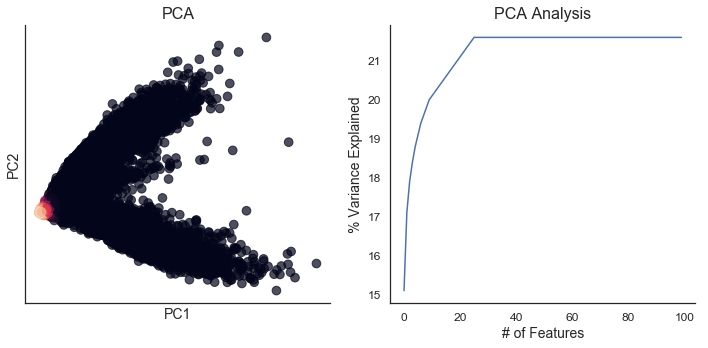

CPU times: user 1min 6s, sys: 17.9 s, total: 1min 24s
Wall time: 1min 9s


In [50]:
%%time
myeloid_PCA = fcc_PCA(myeloid.arcsinh_norm(), n_components=100)
myeloid_PCA.plot()

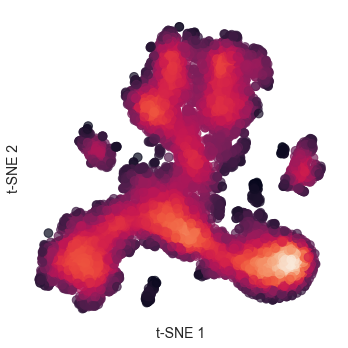

CPU times: user 1min 38s, sys: 4.63 s, total: 1min 42s
Wall time: 1min 43s


In [51]:
%%time
myeloid_tSNE = fcc_tSNE(myeloid_PCA.results, perplexity=30)
myeloid_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12cafb6d8>)

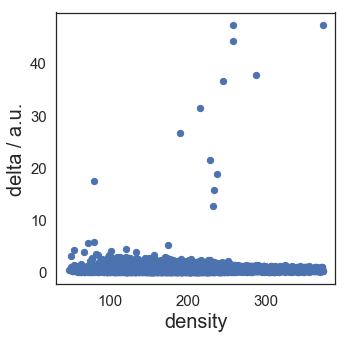

In [52]:
myeloid_tSNE.clu.draw_decision_graph()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1691ede10>)

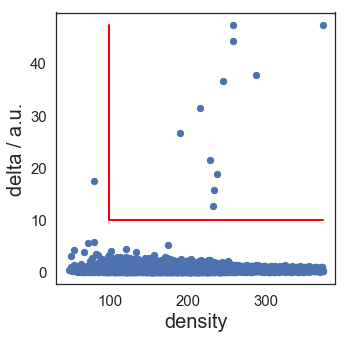

In [53]:
myeloid_tSNE.clu.assign(100, 10)
myeloid_tSNE.clu.draw_decision_graph(min_delta=myeloid_tSNE.clu.min_delta, min_density=myeloid_tSNE.clu.min_density)

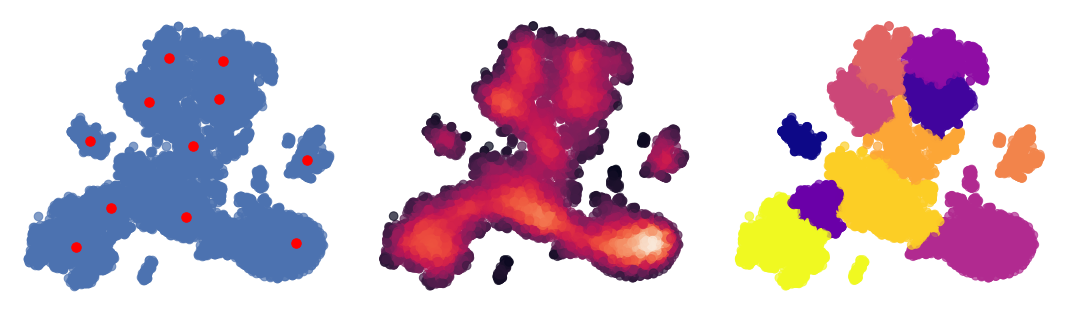

In [54]:
myeloid_tSNE.plot_clusters()

In [55]:
myeloid_tSNE.silhouette_score

0.38438284

In [56]:
myeloid_0 = RNA_counts.downsample_proportional(counts_obj=myeloid, clu_membership=myeloid_tSNE.clu.membership, n_cells=1000, seed=18)

In [57]:
myeloid_0_select = RNA_counts.var_select(counts_obj=myeloid_0, n_features=500)

In [58]:
myeloid_0_select.data.shape # now we should have 500 genes and ~1000 cells

(1006, 500)

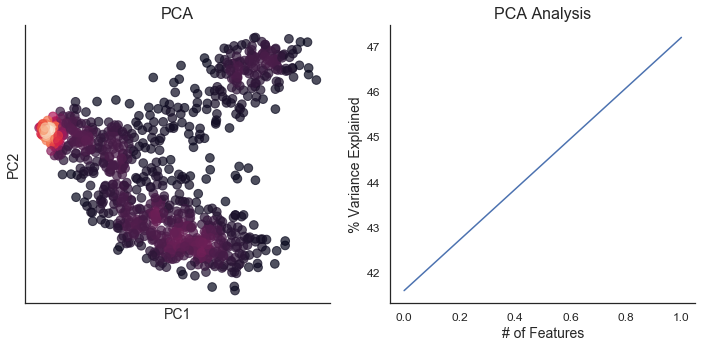

CPU times: user 803 ms, sys: 93.4 ms, total: 896 ms
Wall time: 513 ms


In [60]:
%%time
myeloid_0_select_PCA_2 = fcc_PCA(myeloid_0_select.arcsinh_norm(), n_components=2)
myeloid_0_select_PCA_2.plot()

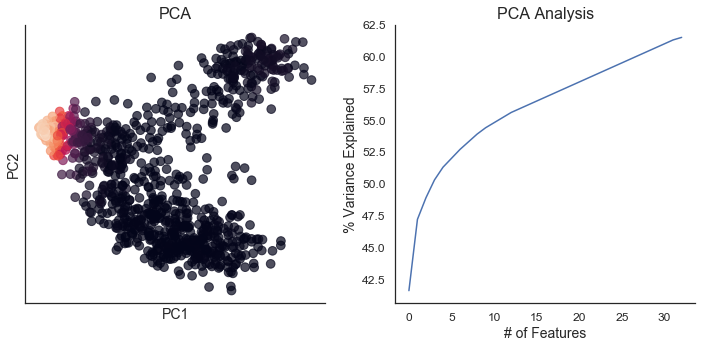

CPU times: user 862 ms, sys: 79.9 ms, total: 942 ms
Wall time: 533 ms


In [61]:
%%time
# 33-component PCA to compare to DCA
myeloid_0_select_PCA_33 = fcc_PCA(myeloid_0_select.arcsinh_norm(), n_components=33)
myeloid_0_select_PCA_33.plot()

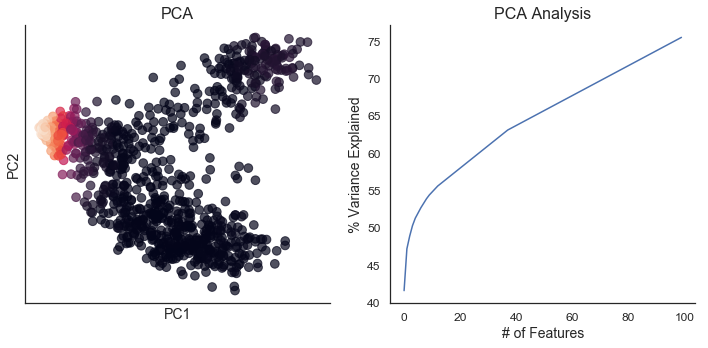

CPU times: user 979 ms, sys: 102 ms, total: 1.08 s
Wall time: 622 ms


In [62]:
%%time
# 100-component PCA to compare to DCA
myeloid_0_select_PCA_100 = fcc_PCA(myeloid_0_select.arcsinh_norm(), n_components=100)
myeloid_0_select_PCA_100.plot()

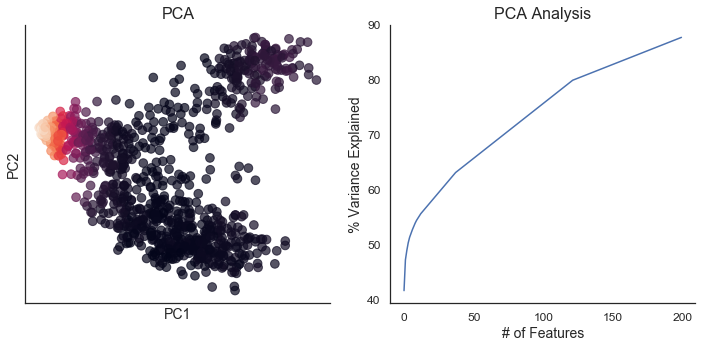

CPU times: user 1.12 s, sys: 110 ms, total: 1.23 s
Wall time: 701 ms


In [63]:
%%time
# 200-component PCA to compare to DCA
myeloid_0_select_PCA_200 = fcc_PCA(myeloid_0_select.arcsinh_norm(), n_components=200)
myeloid_0_select_PCA_200.plot()

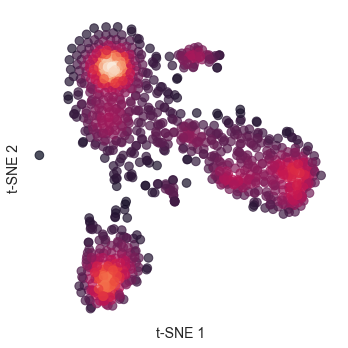

CPU times: user 6.77 s, sys: 198 ms, total: 6.96 s
Wall time: 6.86 s


In [64]:
%%time
myeloid_0_select_tSNE = fcc_tSNE(myeloid_0_select.arcsinh_norm(), perplexity=30)
myeloid_0_select_tSNE.plot()

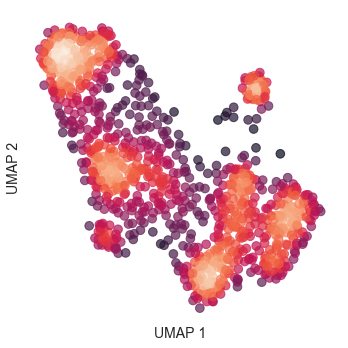

CPU times: user 2.78 s, sys: 207 ms, total: 2.99 s
Wall time: 2.81 s


In [65]:
%%time
myeloid_0_select_UMAP = fcc_UMAP(myeloid_0_select.arcsinh_norm(), perplexity=30)
myeloid_0_select_UMAP.plot()

In [86]:
%%time
# perform DCA to reduce to 33 features
myeloid_0_select_DCA = fcc_DCA(myeloid_0_select.counts, norm=False)

DCA: Successfully preprocessed 500 genes and 1006 cells.
Calculating low dimensional representations...
Calculating reconstructions...
CPU times: user 32.7 s, sys: 1.36 s, total: 34.1 s
Wall time: 20.8 s


In [87]:
myeloid_0_select_DCA.results.shape

(1006, 500)

Perform Euclidean distance comparisons

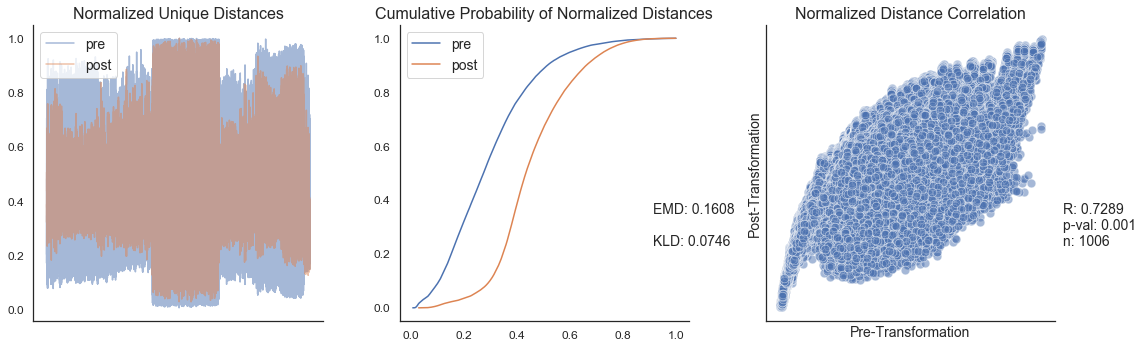

CPU times: user 27.3 s, sys: 2.92 s, total: 30.3 s
Wall time: 29.9 s


In [67]:
# 100-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_select.distance_matrix(), post=myeloid_0_select_PCA_100.distance_matrix())

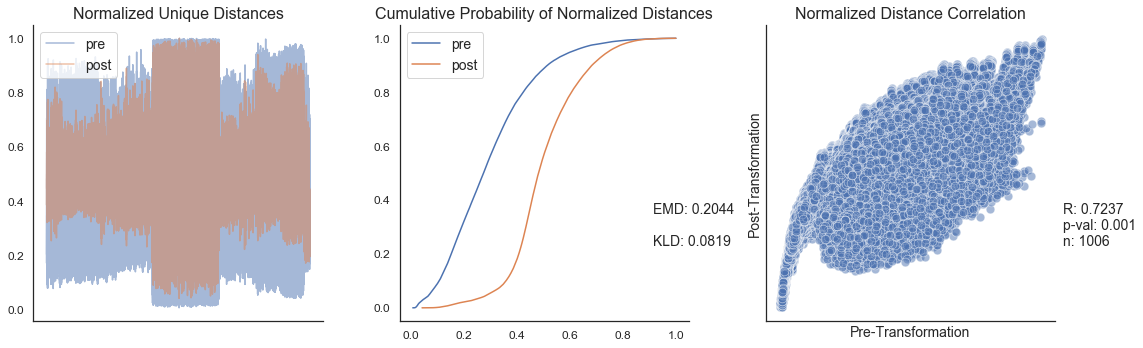

CPU times: user 26.9 s, sys: 3.85 s, total: 30.8 s
Wall time: 30.2 s


In [68]:
# 200-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_select.distance_matrix(), post=myeloid_0_select_PCA_200.distance_matrix())

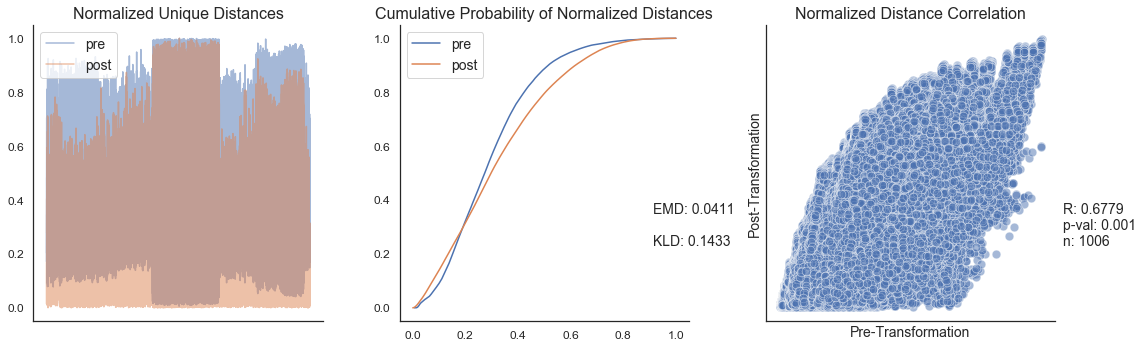

CPU times: user 29.2 s, sys: 4.23 s, total: 33.5 s
Wall time: 32.8 s


In [69]:
# 2-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_select.distance_matrix(), post=myeloid_0_select_PCA_2.distance_matrix())

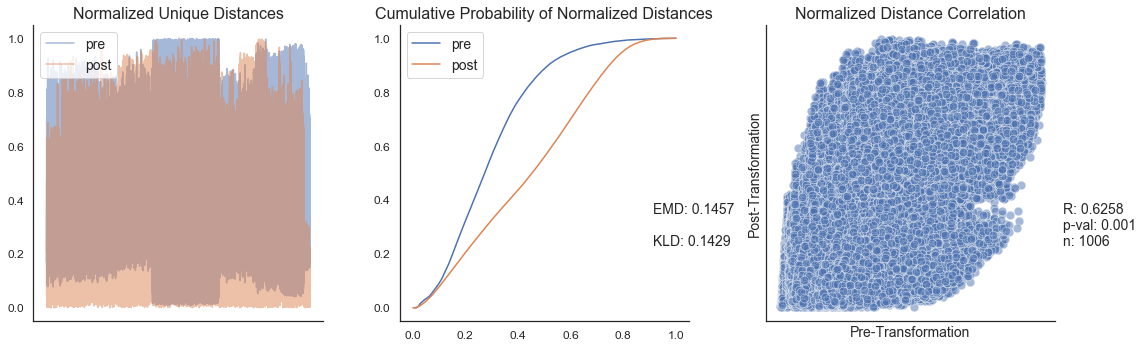

CPU times: user 48.4 s, sys: 6.37 s, total: 54.8 s
Wall time: 54 s


In [70]:
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_select.distance_matrix(), post=myeloid_0_select_tSNE.distance_matrix())

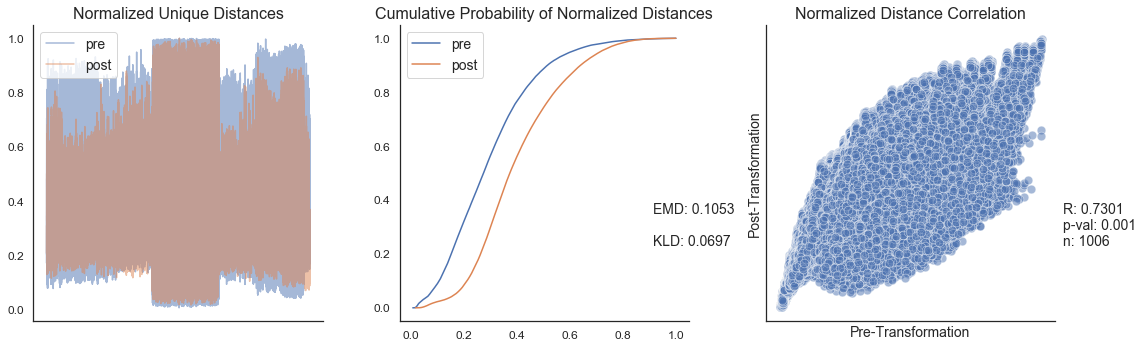

CPU times: user 1min, sys: 8.41 s, total: 1min 8s
Wall time: 1min 11s


In [71]:
# 33-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_select.distance_matrix(), post=myeloid_0_select_PCA_33.distance_matrix())

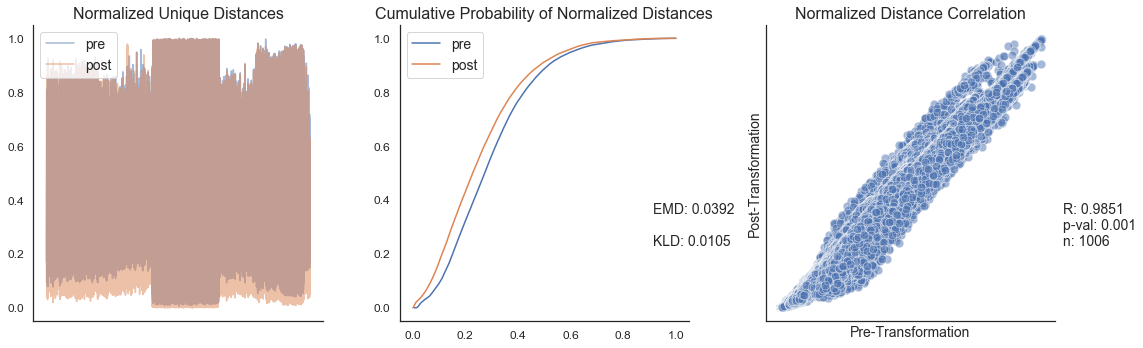

CPU times: user 27.6 s, sys: 4.49 s, total: 32.1 s
Wall time: 31.8 s


In [88]:
# DCA
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_select.distance_matrix(), post=myeloid_0_select_DCA.distance_matrix())

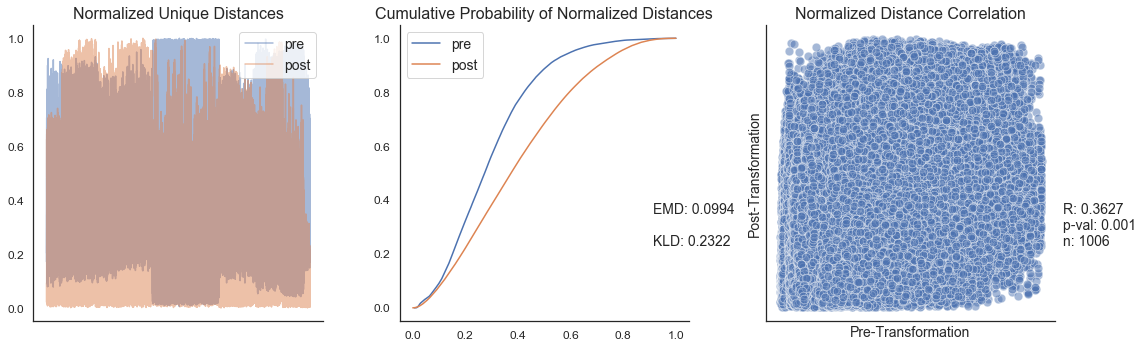

CPU times: user 1min 2s, sys: 9.51 s, total: 1min 12s
Wall time: 1min 16s


In [75]:
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_select.distance_matrix(), post=myeloid_0_select_UMAP.distance_matrix())

---
#### 6. NVR selection on continuous dataset

In [120]:
myeloid_pCreode = RNA_counts.from_file('inputs/Myeloid_with_IDs.csv')


Index(['1190002H23RIK', '1190007F08RIK', '2210020M01RIK', '3110082D06RIK',
       'AK084954', 'IGHG1', 'ADSSL1', 'ALAD', 'ALAS1', 'ALAS2',
       ...
       'TMSB4X', 'TNFAIP2', 'TNNI3', 'TREM3', 'TSPO', 'TYROBP', 'UQCRH',
       'VAMP5', 'VIM', 'ZFPM1'],
      dtype='object', length=170)

In [136]:
myeloid_pCreode.gene_IDs

Index(['1190002H23RIK', '1190007F08RIK', '2210020M01RIK', '3110082D06RIK',
       'AK084954', 'IGHG1', 'ADSSL1', 'ALAD', 'ALAS1', 'ALAS2',
       ...
       'TMSB4X', 'TNFAIP2', 'TNNI3', 'TREM3', 'TSPO', 'TYROBP', 'UQCRH',
       'VAMP5', 'VIM', 'ZFPM1'],
      dtype='object', length=170)

In [137]:
myeloid_0_var.gene_IDs

Index(['Mpo', 'Actb', 'Prtn3', 'Elane', 'Rplp1', 'Car2', 'Rpl4', 'Car1',
       'Rps5', 'Rps3;Snord15b',
       ...
       'Hspa5', 'Rpl30', 'Cct2', 'Park7;dj-1', 'Txn1', 'Ndufb9', 'Eif3k',
       'Anp32b', 'Uqcrq', 'Psmb8'],
      dtype='object', length=150)

In [134]:
myeloid_0_var = RNA_counts.var_select(counts_obj=myeloid_0, n_features=150)

In [94]:
%time myeloid_0_NVR = RNA_counts.nvr_select(counts_obj=myeloid_0, scale=1000)

Start min_conn_k
2 connections needed
Finished min_conn_k 
Start traj_dist
Finished traj_dist
Start adaptive_knn_graph
Finished adaptive_knn_graph
Start global variance calculation
Finished global variance calculation
Start neighborhood variance calculation
Completion:
Finished neighborhood variance calculation
Start global to neighborhood variance ratio calculation
Finished global to neighborhood variance ratio calculation
Finished selection_val
Finished gene selection in 364.050167798996 seconds
done

Selected 157 variable genes

CPU times: user 6min 2s, sys: 2.25 s, total: 6min 5s
Wall time: 6min 6s


In [135]:
set(myeloid_0_var.gene_IDs).intersection(myeloid_pCreode.gene_IDs)

set()

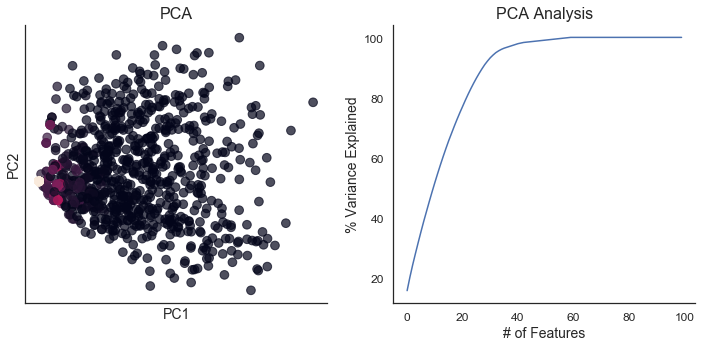

CPU times: user 877 ms, sys: 82.7 ms, total: 960 ms
Wall time: 531 ms


In [109]:
%%time
myeloid_0_NVR_PCA_100 = fcc_PCA(myeloid_0_NVR.arcsinh_norm(), n_components=100)
myeloid_0_NVR_PCA_100.plot()

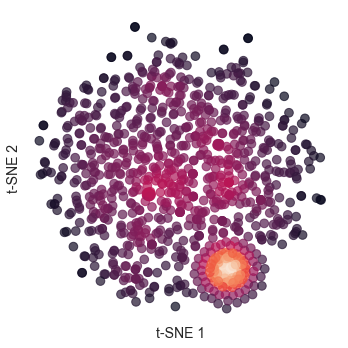

CPU times: user 6.84 s, sys: 266 ms, total: 7.11 s
Wall time: 6.94 s


In [110]:
%%time
myeloid_0_NVR_PCAtSNE = fcc_tSNE(myeloid_0_NVR_PCA_100.results, perplexity=30)
myeloid_0_NVR_PCAtSNE.plot()

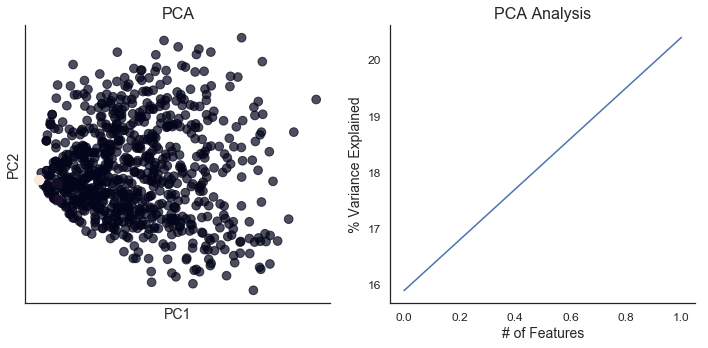

CPU times: user 745 ms, sys: 70.7 ms, total: 816 ms
Wall time: 451 ms


In [98]:
%%time
myeloid_0_NVR_PCA_2 = fcc_PCA(myeloid_0_NVR.arcsinh_norm(), n_components=2)
myeloid_0_NVR_PCA_2.plot()

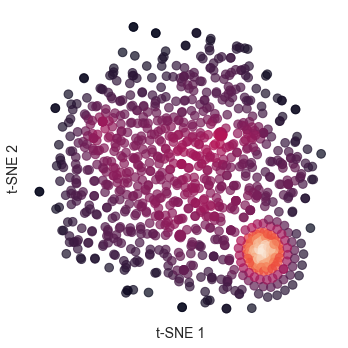

CPU times: user 7.39 s, sys: 273 ms, total: 7.67 s
Wall time: 7.52 s


In [99]:
%%time
myeloid_0_NVR_tSNE = fcc_tSNE(myeloid_0_NVR.arcsinh_norm(), perplexity=30)
myeloid_0_NVR_tSNE.plot()

/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/umap/umap_.py:926: RuntimeWarning: invalid value encountered in less
  graph.data[graph.data < (graph.data.max() / float(n_epochs))] = 0.0


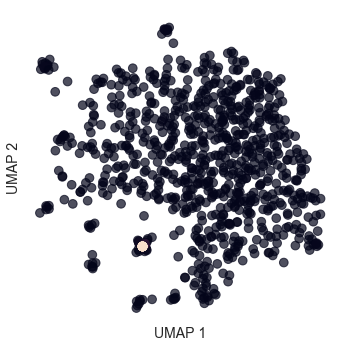

CPU times: user 2.47 s, sys: 145 ms, total: 2.61 s
Wall time: 2.4 s


In [100]:
%%time
myeloid_0_NVR_UMAP = fcc_UMAP(myeloid_0_NVR.arcsinh_norm(), perplexity=30)
myeloid_0_NVR_UMAP.plot()

Now perform Euclidean distance comparisons

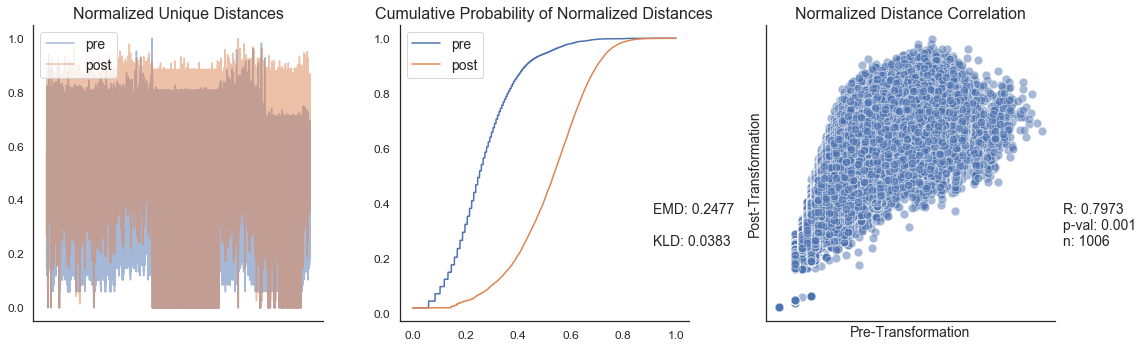

CPU times: user 24.8 s, sys: 3.33 s, total: 28.1 s
Wall time: 27.7 s


In [101]:
# 100-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_NVR.distance_matrix(), post=myeloid_0_NVR_PCA_100.distance_matrix())

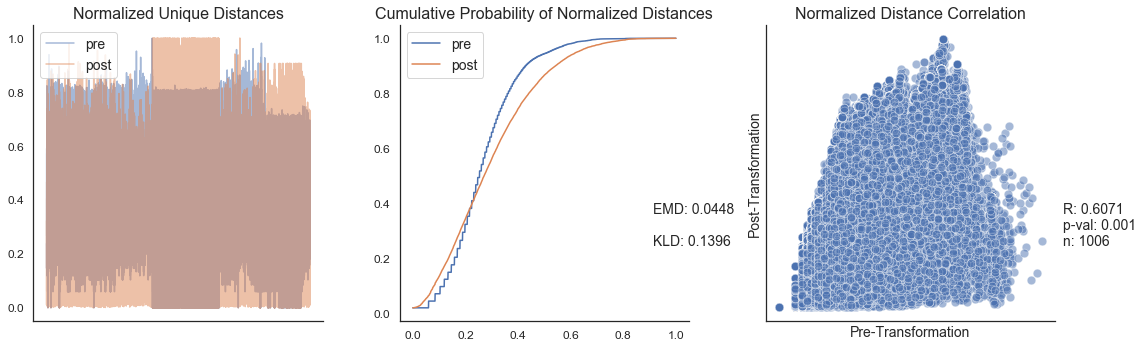

CPU times: user 24.6 s, sys: 3.3 s, total: 27.9 s
Wall time: 27.4 s


In [102]:
# 2-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_NVR.distance_matrix(), post=myeloid_0_NVR_PCA_2.distance_matrix())

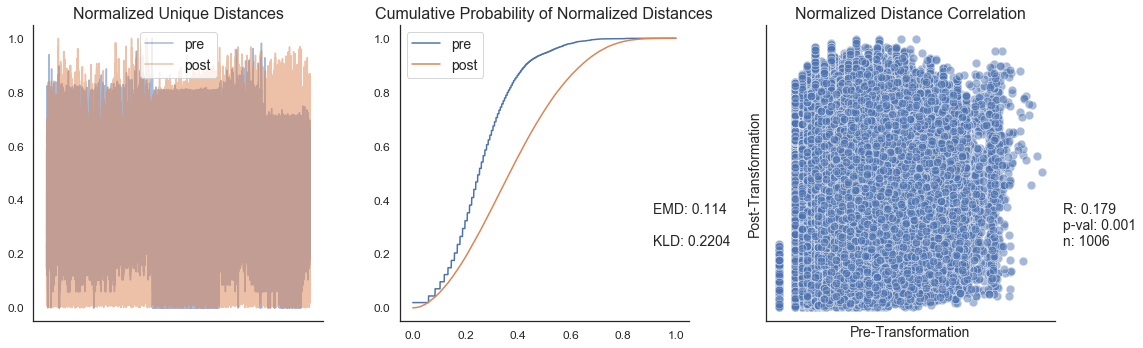

CPU times: user 24.6 s, sys: 3.26 s, total: 27.8 s
Wall time: 27.2 s


In [103]:
# t-SNE on downsampled, feature-selected data
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_NVR.distance_matrix(), post=myeloid_0_NVR_tSNE.distance_matrix())

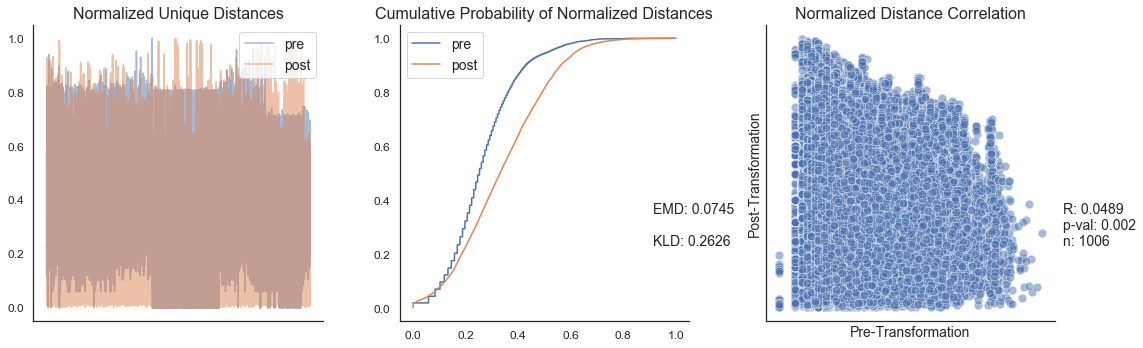

CPU times: user 24.3 s, sys: 2.73 s, total: 27.1 s
Wall time: 26.4 s


In [104]:
# UMAP on downsampled, feature-selected data
%time mantel, EMD, KLD = compare_euclid(pre=myeloid_0_NVR.distance_matrix(), post=myeloid_0_NVR_UMAP.distance_matrix())

---

In [2]:
from scvi.dataset import CsvDataset
import urllib

In [3]:
# Loading a local dataset into scVI
colon1_scVI = CsvDataset('GSM2743164_rep1_colon_rnaseq.csv.gz', 
                               save_path='inputs/', 
                               compression='gzip') 

File inputs/GSM2743164_rep1_colon_rnaseq.csv.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
Downsampling from 25504 to 600 genes
Downsampling from 1738 to 1738 cells


#### Training scVI
* __n_epochs__: Maximum number of epochs to train the model. If the likelihood change is small than a set threshold training will stop automatically. 
* __lr__: learning rate. Set to 0.001 here. 
* __use_batches__: If the value of true than batch information is used in the training. Here it is set to false because the data only contains one batch. 
* __use_cuda__: Set to true to use CUDA. 


In [4]:
from scvi.models import *
from scvi.inference import UnsupervisedTrainer
n_epochs=400 
lr=1e-3
use_batches=False
use_cuda=True

%matplotlib inline

**Train the model and output model likelihood every 5 epochs**

In [5]:
vae = VAE(colon1_scVI.nb_genes, n_batch=colon1_scVI.n_batches * use_batches)
trainer = UnsupervisedTrainer(vae,
                              colon1_scVI,
                              train_size=0.75,
                              use_cuda=use_cuda,
                              frequency=5)
trainer.train(n_epochs=n_epochs, lr=lr)

training: 100%|███████████████████████████████████████████████████████████████████████████████████| 400/400 [02:29<00:00,  2.59it/s]


**Plotting the likelihood change across the 500 epochs of training: blue for training error and orange for testing error.**

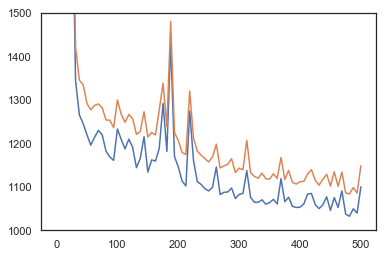

In [6]:
ll_train_set = trainer.history["ll_train_set"]
ll_test_set = trainer.history["ll_test_set"]
x = np.linspace(0,500,(len(ll_train_set)))
plt.plot(x, ll_train_set)
plt.plot(x, ll_test_set)
plt.ylim(1000,1500)
plt.show()

In [7]:
type(trainer.test_set).__name__

'Posterior'

In [62]:
trainer.train_set.raw_data()[0] # I think this is the counts? At least for the training set.

array([[192.,  70.,   0., ...,   5.,   4.,   5.],
       [615., 348., 161., ...,   4.,   4.,   3.],
       [370., 118.,  30., ...,   3.,   1.,   2.],
       ...,
       [ 18.,  13.,   2., ...,   1.,   0.,   1.],
       [  4., 335.,   3., ...,   0.,   2.,   1.],
       [  3.,   0.,   1., ...,   0.,   0.,   2.]], dtype=float32)

In [68]:
colon1_scVI_preprocessed = RNA_counts(data=colon1_scVI.X.astype('double'), labels=[None,None])

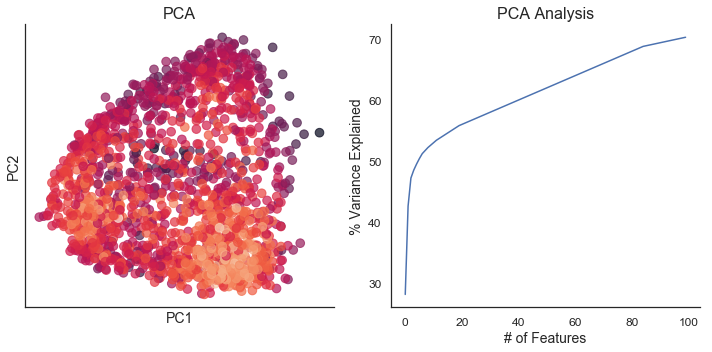

In [71]:
colon1_scVI_PCA = fcc_PCA(colon1_scVI_preprocessed.arcsinh_norm(), n_components=100)
colon1_scVI_PCA.plot()

In [72]:
%%time
colon1_scVI_tSNE = fcc_tSNE(colon1_scVI_PCA.results, perplexity=30)
colon1_scVI_tSNE.plot()

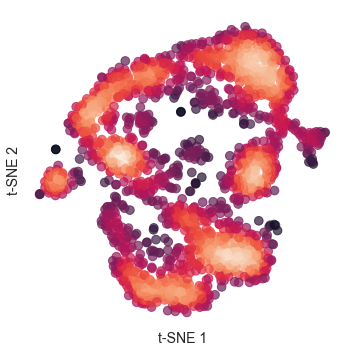

In [73]:
colon1_scVI_tSNE.plot()

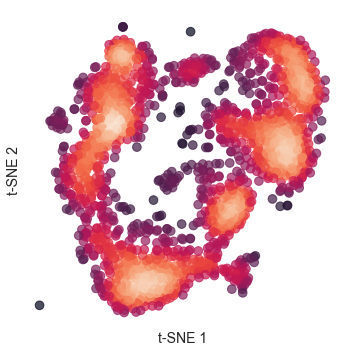

CPU times: user 13.4 s, sys: 440 ms, total: 13.8 s
Wall time: 13.8 s


In [74]:
%%time
colon1_scVI_tSNE = fcc_tSNE(colon1_scVI_preprocessed.arcsinh_norm(), perplexity=30)
colon1_scVI_tSNE.plot()

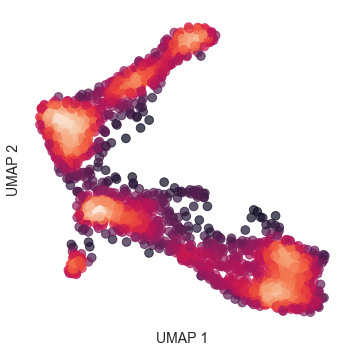

CPU times: user 10.3 s, sys: 586 ms, total: 10.9 s
Wall time: 11.1 s


In [75]:
%%time
colon1_scVI_UMAP = fcc_UMAP(colon1_scVI_preprocessed.arcsinh_norm(), perplexity=30)
colon1_scVI_UMAP.plot()

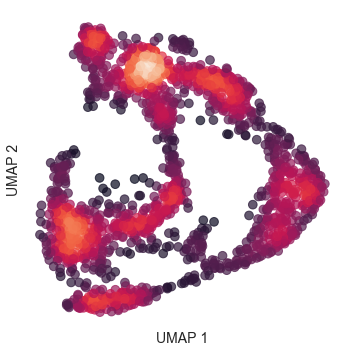

CPU times: user 4.58 s, sys: 255 ms, total: 4.83 s
Wall time: 4.59 s


In [76]:
%%time
colon1_scVI_UMAP = fcc_UMAP(colon1_scVI_PCA.results, perplexity=30)
colon1_scVI_UMAP.plot()

See how this is different (if at all) from variance feature selection to 600 genes.  
That might be all that this did...

In [79]:
colon1 = RNA_counts.from_file('inputs/GSM2743164_rep1_colon_rnaseq.csv.gz', cells_axis=1)

In [83]:
colon1_600genes = RNA_counts.var_select(counts_obj=colon1, n_features=600)

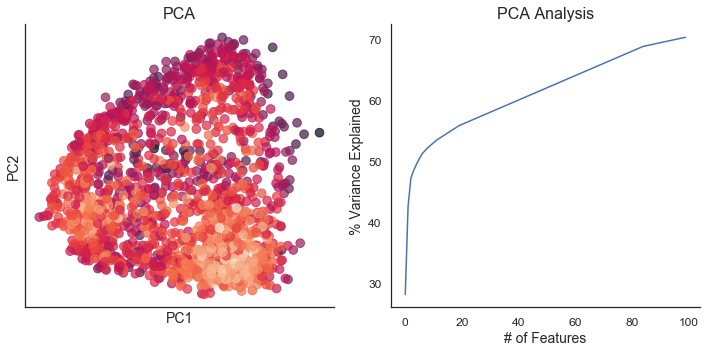

CPU times: user 1.34 s, sys: 135 ms, total: 1.48 s
Wall time: 929 ms


In [84]:
%%time
colon1_600genes_PCA = fcc_PCA(colon1_600genes.arcsinh_norm(), n_components=100)
colon1_600genes_PCA.plot()

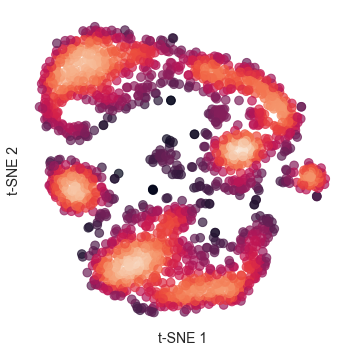

CPU times: user 10.6 s, sys: 415 ms, total: 11 s
Wall time: 10.9 s


In [85]:
%%time
colon1_600genes_tSNE = fcc_tSNE(colon1_600genes_PCA.results, perplexity=30)
colon1_600genes_tSNE.plot()

Okay, these are the same, so scVI just downsampled based on variable genes...

In [86]:
colon1_scVI.X.astype('double')

array([[1.377e+03, 4.220e+02, 6.530e+02, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [9.000e+00, 3.000e+00, 2.000e+00, ..., 6.000e+00, 7.000e+00,
        6.000e+00],
       [1.800e+01, 1.000e+01, 5.000e+00, ..., 4.000e+00, 3.000e+00,
        8.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.200e+01, 2.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [87]:
colon1_600genes.counts

array([[1377,  422,  653, ...,    2,    1,    1],
       [   9,    3,    2, ...,    6,    7,    6],
       [  18,   10,    5, ...,    4,    3,    8],
       ...,
       [   0,    0,    0, ...,    1,    0,    0],
       [  12,    2,    0, ...,    1,    0,    0],
       [   8,    1,    0, ...,    0,    0,    0]])

yep.  
  
---

In [8]:
trainer.train_set.raw_data()[0] # I think this is the counts? At least for the training set.

array([[192.,  70.,   0., ...,   5.,   4.,   5.],
       [615., 348., 161., ...,   4.,   4.,   3.],
       [370., 118.,  30., ...,   3.,   1.,   2.],
       ...,
       [ 18.,  13.,   2., ...,   1.,   0.,   1.],
       [  4., 335.,   3., ...,   0.,   2.,   1.],
       [  3.,   0.,   1., ...,   0.,   0.,   2.]], dtype=float32)

In [9]:
colon1_scVI_preprocessed = RNA_counts(data=trainer.train_set.raw_data()[0].astype('double'), labels=[None,None])

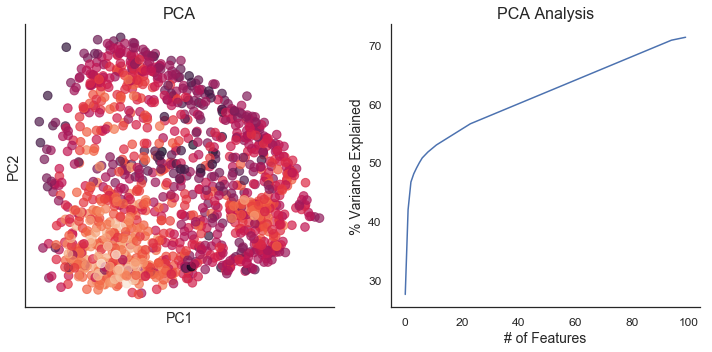

In [10]:
colon1_scVI_PCA = fcc_PCA(colon1_scVI_preprocessed.arcsinh_norm(), n_components=100)
colon1_scVI_PCA.plot()

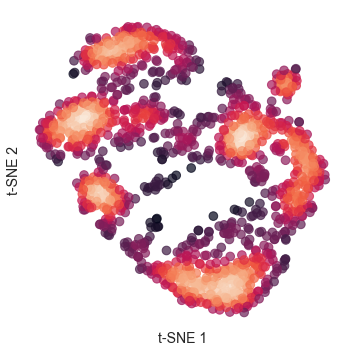

CPU times: user 7.58 s, sys: 65.7 ms, total: 7.65 s
Wall time: 7.51 s


In [11]:
%%time
colon1_scVI_tSNE = fcc_tSNE(colon1_scVI_PCA.results, perplexity=30)
colon1_scVI_tSNE.plot()

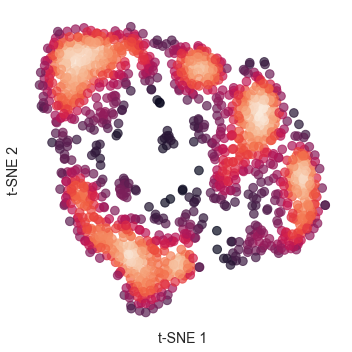

CPU times: user 9.46 s, sys: 81.6 ms, total: 9.54 s
Wall time: 9.37 s


In [12]:
%%time
colon1_scVI_tSNE = fcc_tSNE(colon1_scVI_preprocessed.arcsinh_norm(), perplexity=30)
colon1_scVI_tSNE.plot()

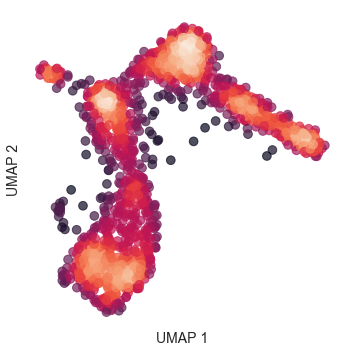

CPU times: user 8.41 s, sys: 268 ms, total: 8.68 s
Wall time: 8.54 s


In [13]:
%%time
colon1_scVI_UMAP = fcc_UMAP(colon1_scVI_preprocessed.arcsinh_norm(), perplexity=30)
colon1_scVI_UMAP.plot()

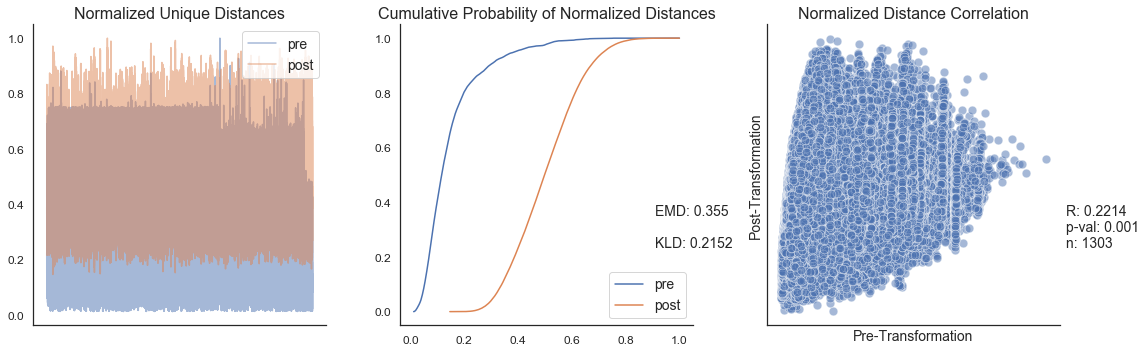

CPU times: user 48 s, sys: 6.65 s, total: 54.6 s
Wall time: 54.3 s


In [16]:
%time mantel, EMD, KLD = compare_euclid(pre=colon1_scVI_preprocessed.distance_matrix(), post=colon1_scVI_PCA.distance_matrix())

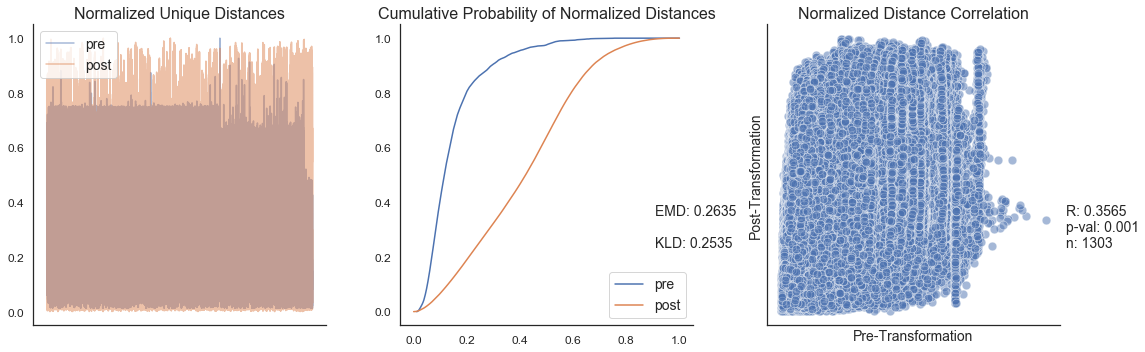

CPU times: user 46.5 s, sys: 5.37 s, total: 51.8 s
Wall time: 51.7 s


In [17]:
%time mantel, EMD, KLD = compare_euclid(pre=colon1_scVI_preprocessed.distance_matrix(), post=colon1_scVI_tSNE.distance_matrix())

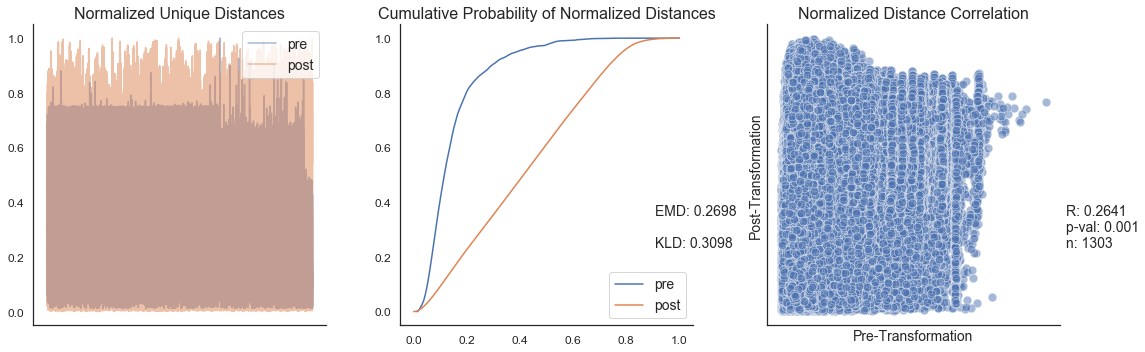

CPU times: user 46.8 s, sys: 6.98 s, total: 53.8 s
Wall time: 53.1 s


In [18]:
%time mantel, EMD, KLD = compare_euclid(pre=colon1_scVI_preprocessed.distance_matrix(), post=colon1_scVI_UMAP.distance_matrix())